#### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [3]:
x1 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y1 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [11]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)
print("Коэффициенты линейной регрессии",b1, b0)
print(f"Модель линейной регрессии имеет вид: 𝑦={b0.round(2)}+{b1.round(2)}*𝑥")

Коэффициенты линейной регрессии 2.620538882402765 444.1773573243596
Модель линейной регрессии имеет вид: 𝑦=444.18+2.62*𝑥


Text(0, 0.5, 'Скоринг')

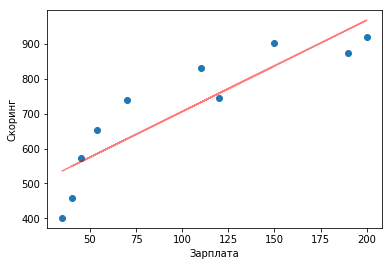

In [13]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Зарплата')
plt.ylabel('Скоринг')

Задача 2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).